# Adult Database Salary Classification

In [139]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn
from sklearn import preprocessing
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as mat
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
import graphviz 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm


%matplotlib inline

In [140]:
data = pd.read_csv('../data/adult.data.txt', sep = ' ', header = None)
data = data.replace({'\$': '', ',': ''}, regex=True)

data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','label']

label = data['label']
for i in range(len(label)):
    if (label[i] == '<=50K'):
        label[i] = 0
    elif (label[i]=='>50K'):
        label[i] = 1
data['label'] = label
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


In [141]:
data.replace('?', np.nan, inplace=True)
data = data.fillna(data.mean())
data = data.apply(lambda x:x.fillna(x.value_counts().index[0]))
data.isnull().values.any()

False

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  object
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  object
 11  capital-loss    32561 non-null  object
 12  hours-per-week  32561 non-null  object
 13  native-country  32561 non-null  object
 14  label           32561 non-null  int64 
dtypes: int64(1), object(14)
memory usage: 3.7+ MB


In [143]:
convert_int = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','label']
data[convert_int] = data[convert_int].astype(str).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int32 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int32 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int32 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int32 
 12  hours-per-week  32561 non-null  int32 
 13  native-country  32561 non-null  object
 14  label           32561 non-null  int32 
dtypes: int32(7), object(8)
memory usage: 2.9+ MB


In [144]:
data_cat = data[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]
data_cat = pd.get_dummies(data_cat)

data = data.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country'], axis = 1).join(data_cat)
data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [145]:
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data)
data_norm = pd.DataFrame(np_scaled, columns = data.columns)
data_norm

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


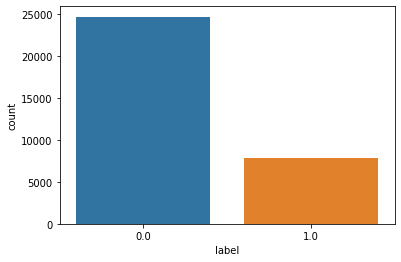

In [146]:
ax = sns.countplot(x="label", data=data_norm)

In [147]:
data_norm.groupby('label').mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
label,,,,,,,,,,,,,,,,,,,,,
0.0,0.271010,0.120927,0.573004,0.001488,0.012200,0.386125,0.023827,0.059709,0.000283,0.783900,...,0.001335,0.004126,0.000364,0.002589,0.001254,0.000607,0.000688,0.907605,0.002508,0.000405
1.0,0.373285,0.119341,0.707444,0.040062,0.044766,0.453806,0.047315,0.078689,0.000000,0.657314,...,0.000510,0.001530,0.000383,0.002041,0.002551,0.000383,0.000255,0.933172,0.000638,0.000765


In [148]:
data_norm.groupby('label').median()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
label,,,,,,,,,,,,,,,,,,,,,
0.0,0.232877,0.113541,0.533333,0.0,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1.0,0.369863,0.111256,0.733333,0.0,0.0,0.397959,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### SMOTE Analysis

In [149]:
data_norm

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.044302,0.800000,0.021740,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.048238,0.800000,0.000000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.138113,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.151068,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.221488,0.800000,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.166404,0.733333,0.000000,0.0,0.377551,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,0.315068,0.096500,0.533333,0.000000,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,0.561644,0.094827,0.533333,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,0.068493,0.128499,0.533333,0.000000,0.0,0.193878,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [151]:
sm = SMOTE(random_state = 42)
X, y = sm.fit_resample(data_norm.drop('label',axis=1), data_norm['label'])
X, y = X.to_numpy(), y.to_numpy()
# data = pd.DataFrame(X, columns = data.columns)

<AxesSubplot:xlabel='label', ylabel='count'>

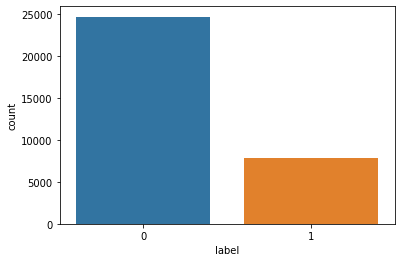

In [125]:
sns.countplot(x = 'label', data = data)

In [154]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from time import time
from numpy import mean
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from mlxtend.plotting import plot_learning_curves
from statsmodels.stats.outliers_influence import variance_inflation_factor
from time import time
from scipy.stats import chi2_contingency

import random
import warnings
warnings.filterwarnings('ignore')

In [160]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)

In [157]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# def validation(rsearch, X_test, y_test, cancer = False):
#     predictions = rsearch.predict(X_test)
#     class_names = ['Thoracic Surgery Risk', 'No Risk']
#     if cancer is True:
#         class_names = ['Cervix Cancer', 'No Cervix Cancer']
#     print('Confusion Matrix: ')
#     print(confusion_matrix(y_test, predictions))
#     print(classification_report(y_test, predictions, target_names = class_names))
#     return predictions

# def decision_tree_classifier(X_train, y_train, cv = 5, scoring = 'accuracy'):
#     print('Decision Tree Classifier')
#     start = time()
#     param_grid = {'criterion': ['gini', 'entropy'],
#                   'max_depth': np.arange(1, 21),
#                   'min_samples_split': np.arange(2, 11),
#                   'min_samples_leaf': np.arange(1, 11)}
    
#     dt = DecisionTreeClassifier()
#     grid_search = GridSearchCV(dt, param_grid, cv = cv, scoring = scoring)
#     grid_search.fit(X_train, y_train)
#     predictions = validation(grid_search, X_test, y_test)
#     print(f"\t Fit and predict time: {np.round(time() - start, 3)} seconds")

# decision_tree_classifier(X_train, y_train, cv = 5, scoring = 'accuracy')

#### Decision Trees

In [46]:
dct = tree.DecisionTreeClassifier()

In [47]:
dct.fit(train.drop('label',axis=1),train['label'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [48]:
prediction_dct = dct.predict(test.drop('label',axis=1))

In [49]:
accuracy_score(test['label'],prediction_dct)

0.8518406148867314

In [50]:
roc_auc_score(test['label'],prediction_dct)

0.8518239098743284

#### Random Forest

In [63]:
clf_rf = RandomForestClassifier(max_depth = 20,random_state=0)

In [64]:
clf_rf.fit(train.drop('label',axis=1),train['label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [65]:
prediction_rf = clf_rf.predict(test.drop('label',axis=1))
accuracy_score(test['label'],prediction_rf)

0.8701456310679612